# Notebook para otimização da análise de Rietveld 

Esse notebook foi criado por [Luciano Martins Figueira](http://lattes.cnpq.br/6326868151550525)

Caso haja necessidade entre em contato via: martinslucianofigueira@gmail.com

Caso queira entender mais sobre o Método de Rietveld [Acesse Aqui](https://en.wikipedia.org/wiki/Rietveld_refinement).

Revisões e modifcações são bem-vindas!



## Como funciona e como usar o Notebook?

A intenção do notebook é fazer a plotagem de difratogramas e posteriormente a análise pelo método de Rietveld com mais rapidez, utilizando um pacote onde lê todos os arquivos dentro de uma determinada pasta e plota-los de maneira eficiênte

## O que precisa para usar o Notebook?

Primeiro há necessidade de fazer a análise do seu material via DRX, posteriormente salvar o arquivo TXT do mesmo em um diretório. Caso em um diretório haja mais arquivos em outros formatos não se preocupe, o código apenas irá reconhecer os arquivos TXT no mesmo.

## Avisos

O notebook foi criado para análises de Rietveld para _**CARBONATO DE CÁLCIO**_ , caso queira utilizar para outro material deverá realizar mudanças na função que simula o rietveld.

O mesmo ainda não se encontra em seu 100% e exige mudanças para melhorar o aperfeiçoamento 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from scipy.optimize import curve_fit,minimize
#import xlsxwriter
#%matplotlib inline

 ## Funções para análise e correção de strings
 
- As seguintes funções tem como objetivo analisar e corrigir as strings utilizadas para serem produto de reconhecimento em outras funções, como título dos gráficos e pontos durante uma linha de experimento ou o número da réplica.
    * _<font color=blue>remove_duplicate_words</font>_
        * A função tem como objetivo retirar palavras duplicadas em sua string.
    * _<font color=blue>rename</font>_
        * A função tem como objetivo renomear o nome do diretório afim de utiliza-lo em outra função.
    * _<font color=blue>search_position</font>_
        * A função tem como objetivo encontrar os valores a serem plotados no arquivo txt.

In [2]:
#For change the titles/file names
def remove_duplicate_words(string):
    return ' '.join(set(string.split()))

def rename(file):
    file = file.replace(".txt",".").upper()
    file = file = file.split("/")
    file = file[-1]
    return(file)

def search_position(file):
    with open(file) as f:
        header = 1
        for line in f:
            if "[Data]" in line:
                return(header)
            else:
                header+=1

## Funções para plotagem de difratograma
- As seguintes funções tem como objetivo analisar e corrigir as strings utilizadas para serem produto de reconhecimento em outras funções, como título dos gráficos e pontos durante uma linha de experimento ou o número da réplica.
    * _<font color=blue>plot_difratrogram</font>_
        * A função tem como objetivo plotar um difratograma de seus arquivos

In [3]:
def plot_difratrogram(file_location):
    file_location = file_location+"/*.txt"
    for file in glob.glob(file_location):
        title = 'Diffractogram of '+ rename(file)
        plt.title(title)
        position = search_position(file)
        file = pd.read_csv(file, sep=",", header=122)
        df = pd.DataFrame(file, columns = ['     Angle', '       PSD'])

        xdata = file['     Angle'].values
        ydata = file['       PSD'].values
        
    
        plt.plot(xdata, ydata, color='black')
        plt.xlabel('2$\\theta$')
        plt.ylabel('Intensity (a.u.)')
        #plt.savefig(title)
        plt.figure(figsize=(15/2.54,12/2.54))
        plt.rc('font', size=11)
        plt.show() 

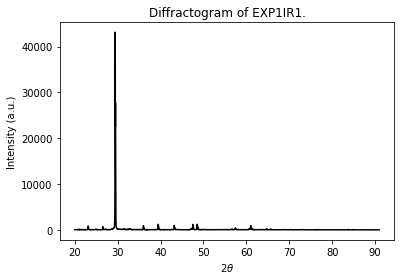

<Figure size 425.197x340.157 with 0 Axes>

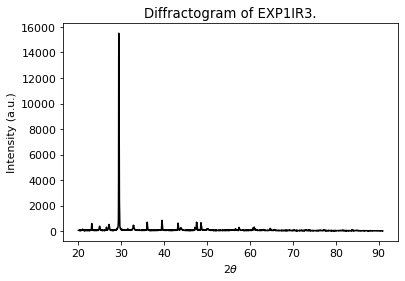

<Figure size 425.197x340.157 with 0 Axes>

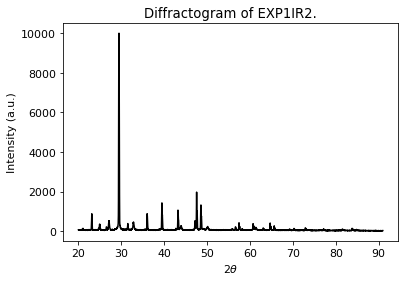

<Figure size 425.197x340.157 with 0 Axes>

In [4]:
plot_difratrogram("/home/lucianomartins/Documentos/NIDF/Experimento Vaterita-Calcita/DRX/EXP1I")

## Função para plotagem do Rietveld

- As seguintes funções tem como objetivo 

    * _<font color=blue>G</font>_
        * A função tem como objetivo ...
    * _<font color=blue>L</font>_
        * A função tem como objetivo ...
    * _<font color=blue>B</font>_
        * A função tem como objetivo ...
    * _<font color=blue>pseudoVoigt</font>_
        * A função tem como objetivo ...
    * _<font color=blue>DRXFit</font>_
        * A função tem como objetivo ...
    * _<font color=blue>plot_rietveld</font>_
        * A função tem como objetivo ...

In [7]:
def G(x,x0,sigma):
    fac = 1.0/np.sqrt(2*np.pi)/sigma
    return fac*np.exp(-np.power((x-x0)/sigma,2.0))

def L(x,x0,Gamma):
    fac = Gamma/np.pi
    return fac*(1.0/(np.power((x-x0),2.0)+np.power(Gamma,2.0)))

def B(x,b0,b1,b2):
    return b2*x**2+b1*x+b0

def pseudoVoigt(x,x0,eta,Gamma):
    sigmaGaussian = Gamma/np.sqrt(2*np.log(2))
    return ((1-eta)*G(x,x0,sigmaGaussian)+eta*L(x,x0,Gamma))

In [8]:
def plot_rietveld(file_location):
    file_location=file_location+"/*.txt"
    for filename in glob.glob(file_location):
        with open(filename) as f:
            with open("read_file.txt","+w") as new_f:
                header=search_position(filename)
                #print(header)
                header_now=1
                for line in f:
                    if header_now>header:
                        new_f.write(line)
                        header_now+=1
                    else: 
                        header_now+=1   
                        
        data = pd.read_csv("read_file.txt", sep=",", header=0) #122
        #print(data)
        xdata = data['     Angle'].values
        ydata = data['       PSD'].values

        ####### Background Fitting 

        xslicedB = xdata[0:100].tolist()+xdata[1542:1750].tolist()+xdata[-100:-1].tolist()
        yslicedB = ydata[0:100].tolist()+ydata[1542:1750].tolist()+ydata[-100:-1].tolist()

        poptB, pcovB = curve_fit(B, xslicedB, yslicedB, p0=(min(yslicedB),0.0,0.0), ftol=1e-6)
        perrB = np.sqrt(np.diag(pcovB))

        b0 = poptB[0]
        b1 = poptB[1]
        b2 = poptB[2]

        # Fit function
        def DRXFit(x, I, x0, eta, Gamma):
            return (B(x,b0,b1,b2) + I*pseudoVoigt(x,x0,eta,Gamma))


        ############## Calcite peak 

        x0C = 29.5

        xslicedC = xdata[425:524]
        yslicedC = ydata[425:524]

        poptC, pcovC = curve_fit(DRXFit, xslicedC, yslicedC, p0=(0.9*max(yslicedC),x0C,0.5,0.5),bounds=([0.0,x0C-0.5,0.0,0.0],[1.0*max(yslicedC),x0C+0.5,1.0,2.0]), ftol=1e-6)
        perrC = np.sqrt(np.diag(pcovC))

        IC = poptC[0]


        ############## Vaterite peak 
        x0V = 25.0

        xslicedV = xdata[201:300]
        yslicedV = ydata[201:300]

        poptV, pcovV = curve_fit(DRXFit, xslicedV, yslicedV, p0=(0.9*max(yslicedV),x0V,0.5,0.5),bounds=([0.0,x0V-0.5,0.0,0.0],[1.0*max(yslicedV),x0V+0.5,1.0,2.0]), ftol=1e-6)
        perrV = np.sqrt(np.diag(pcovV))

        IV = poptV[0]


        ############## Aragonite peak 
        x0A = 45.9

        xslicedA = xdata[1239:1339]
        yslicedA = ydata[1239:1339]

        poptA, pcovA = curve_fit(DRXFit, xslicedA, yslicedA, p0=(0.9*max(yslicedA),x0A,0.5,0.5), bounds=([0.0,x0A-0.5,0.0,0.0],[1.0*max(yslicedA),x0A+0.5,1.0,2.0]), ftol=1e-6)
        perrA = np.sqrt(np.diag(pcovA))

        IA = poptA[0]


        #### Fraction of each Species

        # aV = 4.0; aA=3.5 (Original from Dickison)

        aV = 9.69
        aA = 0.97

        deno = IC + aV*IV + aA*IA

        xC = IC/deno
        xV = aV*IV/deno
        xA = aA*IA/deno
        
        title = 'Diffractogram of '+ rename(filename)
        print(title)
        #plt.title(title)
        fig = plt.figure(figsize=(15/2.54,12/2.54))
        plt.rc('font', size=11)
        plt.plot(xdata,ydata, '.', label='data')
        plt.plot(xdata, B(xdata,*poptB), label='backg.') 
        plt.plot(xslicedC, DRXFit(xslicedC,*poptC), label='calcite') 
        plt.plot(xslicedV, DRXFit(xslicedV,*poptV), label='vaterite') 
        plt.plot(xslicedA, DRXFit(xslicedA,*poptA), label='aragonite') 
        plt.text(60, 0.5*max(ydata), 'xC = %1.2f\nxV = %1.2f\nxA = %1.2f' % (xC*100,xV*100,xA*100), horizontalalignment='center',verticalalignment='center')
        plt.legend()
        plt.xlabel('2$\\theta$')
        plt.ylabel('Intensity (a.u.)')
        plt.show()
        #plt.savefig(title)

Diffractogram of EXP1IR1.


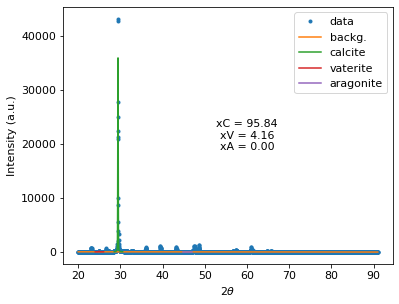

Diffractogram of EXP1IR3.


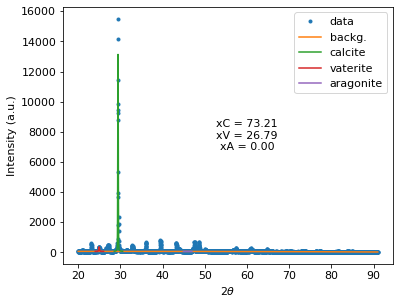

Diffractogram of EXP1IR2.


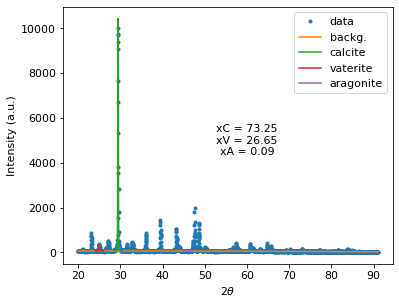

In [9]:
plot_rietveld("/home/lucianomartins/Documentos/NIDF/Experimento Vaterita-Calcita/DRX/EXP1I")

## Implementações em andamento:

- Análise da documentação para encontrar o Data automaticamente ao invés de usar o head=122 (Evitar bugs de txt)
- Implementação de análise do diretório para utilização em função de plotagem para a planta toda ou pontual
- Calibração do código com o software Topas
- Finalização com relatório automático via HTML ou LaTeX 

![Estamos trabalhando para melhorar o código!](https://pbs.twimg.com/media/BouAFGxCEAARE86.png)